In [ ]:
pip install yfinance

In [19]:
import yfinance as yf  # for stock data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error



In [20]:
stock_data = yf.download('AAPL',start='2023-11-20',end="2024-11-20")

stock_data.head(20)

#  ADJ close --> The closing price that has been adjusted for factors like stock splits, dividends, and new stock offerings.

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2023-11-20,190.516647,191.449997,191.910004,189.880005,189.889999,46505100
2023-11-21,189.710602,190.639999,191.520004,189.740005,191.410004,38134500
2023-11-22,190.377319,191.309998,192.929993,190.830002,191.490005,39617700
2023-11-24,189.043869,189.970001,190.899994,189.250000,190.869995,24048300
2023-11-27,188.864746,189.789993,190.669998,188.899994,189.919998,40552600
2023-11-28,189.471771,190.399994,191.080002,189.399994,189.779999,38415400
2023-11-29,188.446793,189.369995,192.089996,188.970001,190.899994,43014200
2023-11-30,189.023972,189.949997,190.320007,188.190002,189.839996,48794400


In [21]:
stock_data.shape

(252, 6)

In [22]:
stock_data.isnull().sum()           # In this data there is no missing values

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [23]:
# creating a Moving Average 

stock_data['30-day MA'] = stock_data['Close'].rolling(window=30).mean()
stock_data['50-day MA'] = stock_data['Close'].rolling(window=50).mean()

stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,30-day MA,50-day MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2024-11-13,225.119995,225.119995,226.649994,222.759995,224.009995,48566200,228.580333,226.8388
2024-11-14,228.220001,228.220001,228.869995,225.000000,225.020004,44923900,228.665333,226.9556
2024-11-15,225.000000,225.000000,226.919998,224.270004,226.399994,47923700,228.605333,227.0392
2024-11-18,228.020004,228.020004,229.740005,225.169998,225.250000,44686000,228.816333,227.1814
2024-11-19,228.279999,228.279999,230.160004,226.660004,226.979996,36211800,228.899999,227.3448


In [24]:
stock_data.isna().sum() 

Price      Ticker
Adj Close  AAPL       0
Close      AAPL       0
High       AAPL       0
Low        AAPL       0
Open       AAPL       0
Volume     AAPL       0
30-day MA            29
50-day MA            49
dtype: int64

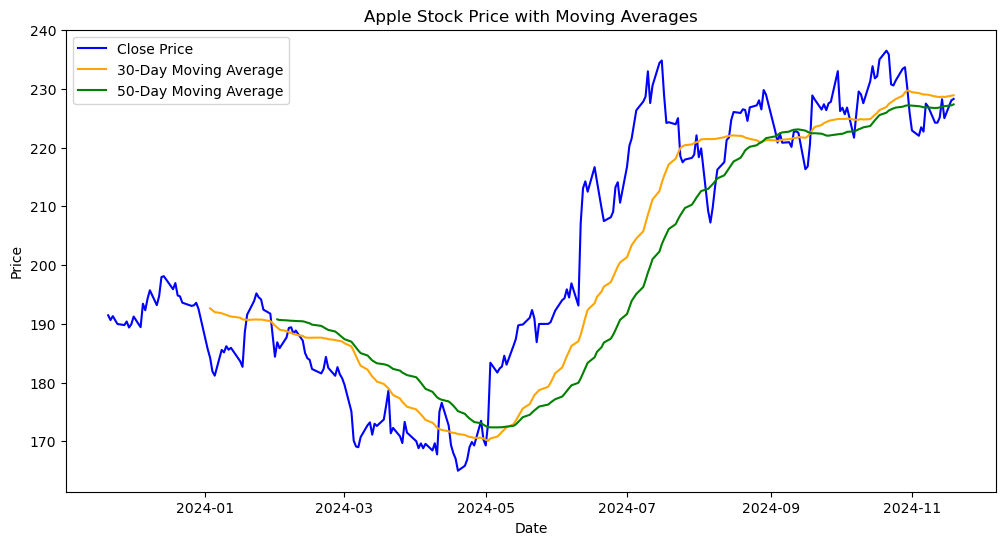

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['30-day MA'], label='30-Day Moving Average', color='orange')
plt.plot(stock_data['50-day MA'], label='50-Day Moving Average', color='green')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [26]:
stock_data['Daily Returns'] = stock_data['Close'].pct_change() 

In [27]:
stock_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,30-day MA,50-day MA,Daily Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,,
2023-11-20,190.516647,191.449997,191.910004,189.880005,189.889999,46505100,NaN,NaN,NaN
2023-11-21,189.710602,190.639999,191.520004,189.740005,191.410004,38134500,NaN,NaN,-0.004231
2023-11-22,190.377319,191.309998,192.929993,190.830002,191.490005,39617700,NaN,NaN,0.003514
2023-11-24,189.043869,189.970001,190.899994,189.250000,190.869995,24048300,NaN,NaN,-0.007004
2023-11-27,188.864746,189.789993,190.669998,188.899994,189.919998,40552600,NaN,NaN,-0.000948
2023-11-28,189.471771,190.399994,191.080002,189.399994,189.779999,38415400,NaN,NaN,0.003214
2023-11-29,188.446793,189.369995,192.089996,188.970001,190.899994,43014200,NaN,NaN,-0.005410
2023-11-30,189.023972,189.949997,190.320007,188.190002,189.839996,48794400,NaN,NaN,0.003063


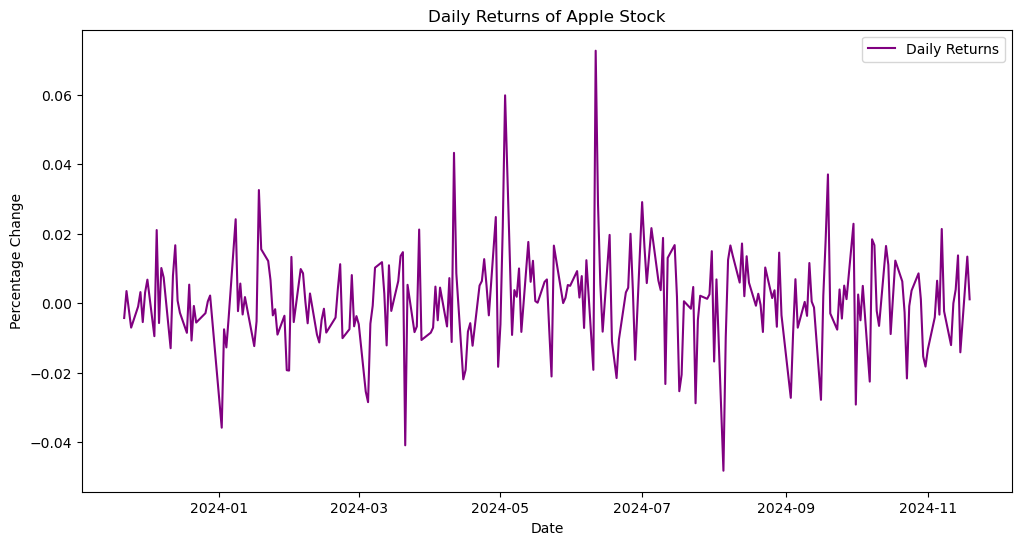

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Daily Returns'], label='Daily Returns', color='purple')
plt.title('Daily Returns of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()
